# Build soma and inserting Hodgkin-Huxley Channel

In [1]:
from neuron import h, gui

In [2]:
# create a new section 'soma' with default properties
soma = h.Section(name = 'soma')

In [3]:
# soma property

# number of segment
soma.nseg = 1

# diameter (um)
soma.diam = 18.8 

# length
soma.L = 18.8

# capacitance
soma.cm = 1.0

# axial resistance
soma.Ra = 123.0

In [4]:
# insert HH channel
soma.insert('hh')

soma

In [5]:
# sodium channel max conductance
soma.gnabar_hh = 0.25

# potassium channel max conductance
soma.gkbar_hh = 0.036

# leakage conductance
soma.gl_hh = 0.000016667

# leakage reversal potential
soma.el_hh = -65.0

In [6]:
# sodium reversal potential
soma.ena = 50

# potassium reversal potential
soma.ek = -81

# Multi-compartment modeling

In [7]:
# create apical dendrite
apical = h.Section(name = 'apical')

In [8]:
# set properties of apical

apical.nseg = 5
apical.diam = 3.18
apical.L = 701.9
apical.Ra = 123

In [9]:
# insert HH channel
apical.insert('hh')

apical

In [10]:
apical.gnabar_hh = 0.01
apical.gkbar_hh = 0.0036
apical.gl_hh = 0.000016667
apical.el_hh = -65

In [11]:
# connect apical(0) onto soma(1)
apical.connect(soma(1), 0)

apical

# Multi-compartment modeling 

In [12]:
# to check the connection of the model
print(h.topology())


|-|       soma(0-1)
   `----|       apical(0-1)

1.0


# Creating a current stimulation on soma

In [13]:
# make IClamp on center of the soma
ic = h.IClamp(soma(0.5))

In [14]:
# setting the property of IClamp

# delay of onset
ic.delay = 10

# duration of onset
ic.dur = 2

# amplitude of Stim
ic.amp = 0.4

# Simulation

In [15]:
# graph
g = h.Graph(0)

# add variable to the item list
g.addvar("soma", soma(0.5)._ref_v)
g.addvar("apical", apical(0.5)._ref_v)

# Record membrane potentials
t = h.Vector().record(h._ref_t)
sv = h.Vector().record(soma(0.5)._ref_v)
av = h.Vector().record(apical(0.5)._ref_v)

In [16]:
# simulation environment

# duration of simulation
h.tstop = 40

# time step
h.dt = 0.025

# initialized Vm
h.v_init = -75

In [17]:
# initialize simulation with resting membrane potential (h.v_init)
h.init()

# run the simulation
h.run()

0.0

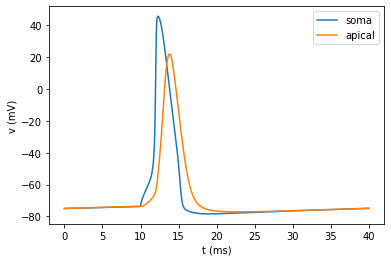

In [18]:
import matplotlib.pyplot as plt

# Plot membrane potentials
plt.figure()
plt.plot(t, sv, label='soma')
plt.plot(t, av, label='apical')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend()
plt.show()